<a href="https://colab.research.google.com/github/Ashithajaina/internship/blob/master/sample_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
diabetes_data= pd.read_csv('diabetes.csv')
print(diabetes_data)

   pregnancies  glucose   Bp  skinthickness  ...   bmi  diabets  age  outcomes
0            0        6  143             35  ...  33.6    0.627   23         1
1            1        1   85             25  ...  26.6    0.351   40         0
2            2        6  183              0  ...  23.3    0.672   21         1
3            3        1   89            211  ...  26.1    0.123   22         0
4            4        2   90             33  ...  33.5    0.324   23         1
5            5        7   99             44  ...  44.6    0.445   22         1
6            6        6   88             55  ...  66.7    0.766   33         1
7            7        3   99             33  ...  33.8    0.765   44         0

[8 rows x 9 columns]


In [0]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
pregnancies      8 non-null int64
glucose          8 non-null int64
Bp               8 non-null int64
skinthickness    8 non-null int64
insulin          8 non-null int64
bmi              8 non-null float64
diabets          8 non-null float64
age              8 non-null int64
outcomes         8 non-null int64
dtypes: float64(2), int64(7)
memory usage: 656.0 bytes


In [0]:
diabetes_data.describe()

,pregnancies,glucose,Bp,skinthickness,insulin,bmi,diabets,age,outcomes
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,3.50000,4.000000,109.500000,54.500000,17.375000,36.025000,0.509125,28.500000,1.375000
std,2.44949,2.507133,35.067282,65.189833,32.004185,14.045614,0.234325,9.211794,0.744024
min,0.00000,1.000000,85.000000,0.000000,0.000000,23.300000,0.123000,21.000000,0.000000
25%,1.75000,1.750000,88.750000,31.000000,0.000000,26.475000,0.344250,22.000000,1.000000
50%,3.50000,4.500000,94.500000,34.000000,5.500000,33.550000,0.536000,23.000000,1.500000
75%,5.25000,6.000000,110.000000,46.750000,14.500000,36.500000,0.695250,34.750000,2.000000
max,7.00000,7.000000,183.000000,211.000000,94.000000,66.700000,0.766000,44.000000,2.000000


In [0]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,8.0,3.500000,2.449490,0.000,1.75000,3.500,5.25000,7.000
glucose,8.0,4.000000,2.507133,1.000,1.75000,4.500,6.00000,7.000
Bp,8.0,109.500000,35.067282,85.000,88.75000,94.500,110.00000,183.000
skinthickness,8.0,54.500000,65.189833,0.000,31.00000,34.000,46.75000,211.000
insulin,8.0,17.375000,32.004185,0.000,0.00000,5.500,14.50000,94.000
bmi,8.0,36.025000,14.045614,23.300,26.47500,33.550,36.50000,66.700
diabets,8.0,0.509125,0.234325,0.123,0.34425,0.536,0.69525,0.766
age,8.0,28.500000,9.211794,21.000,22.00000,23.000,34.75000,44.000
outcomes,8.0,1.375000,0.744024,0.000,1.00000,1.500,2.00000,2.000


In [0]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['glucose','Bp','skinthickness','insulin','bmi']] = diabetes_data_copy[['glucose','Bp','skinthickness','insulin','bmi']].replace(0,np.NaN)

print(diabetes_data_copy.isnull().sum())

pregnancies      0
glucose          0
Bp               0
skinthickness    1
insulin          4
bmi              0
diabets          0
age              0
outcomes         0
dtype: int64


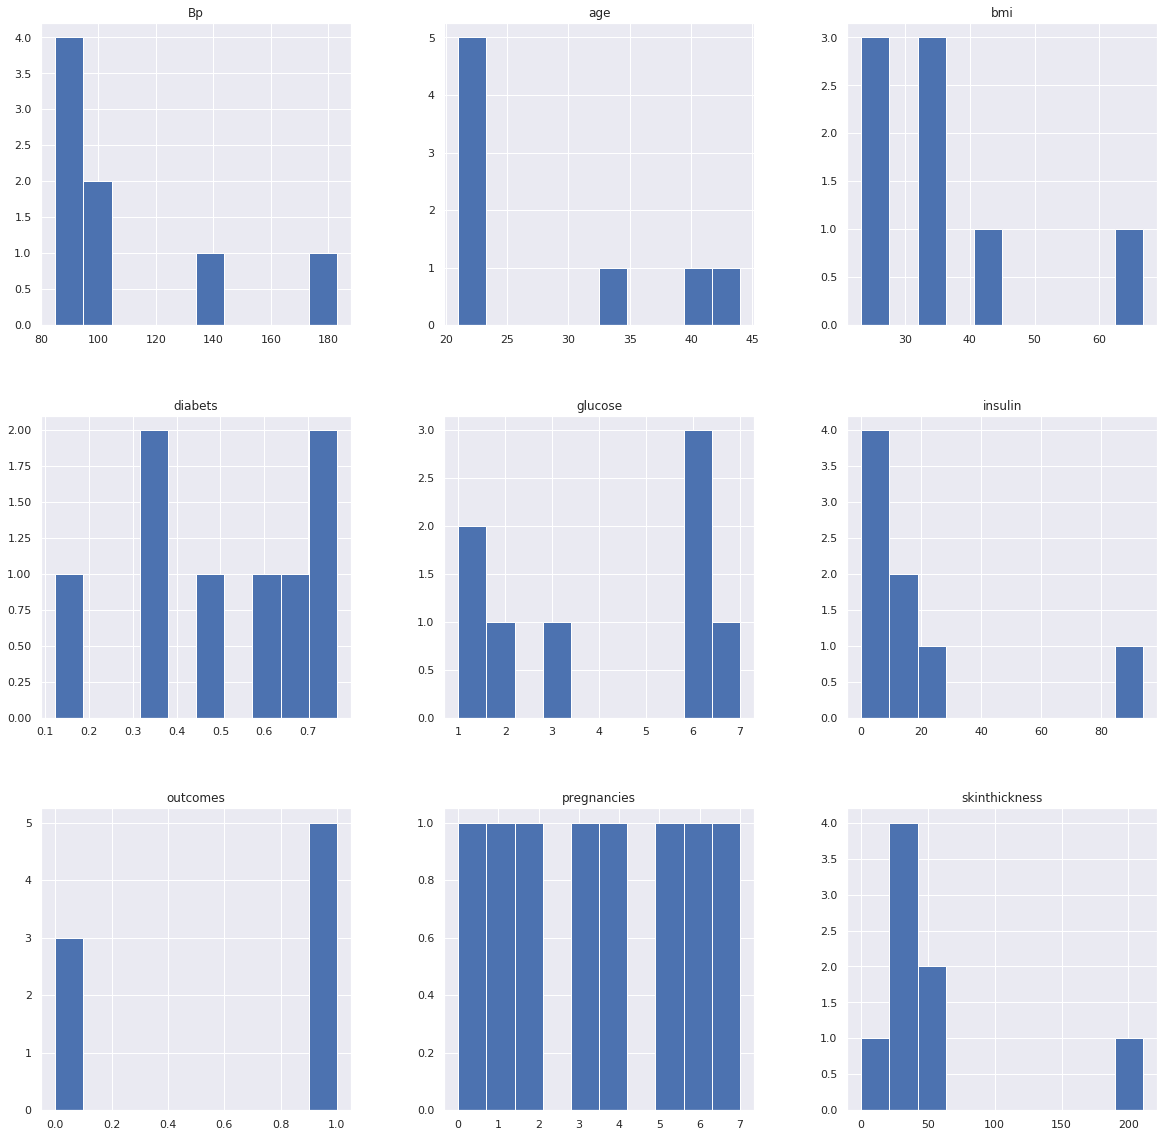

In [0]:
p = diabetes_data.hist(figsize = (20,20))


In [0]:
diabetes_data_copy['glucose'].fillna(diabetes_data_copy['glucose'].mean(), inplace = True)
diabetes_data_copy['Bp'].fillna(diabetes_data_copy['Bp'].mean(), inplace = True)
diabetes_data_copy['skinthickness'].fillna(diabetes_data_copy['skinthickness'].median(), inplace = True)
diabetes_data_copy['insulin'].fillna(diabetes_data_copy['insulin'].median(), inplace = True)
diabetes_data_copy['bmi'].fillna(diabetes_data_copy['bmi'].median(), inplace = True)

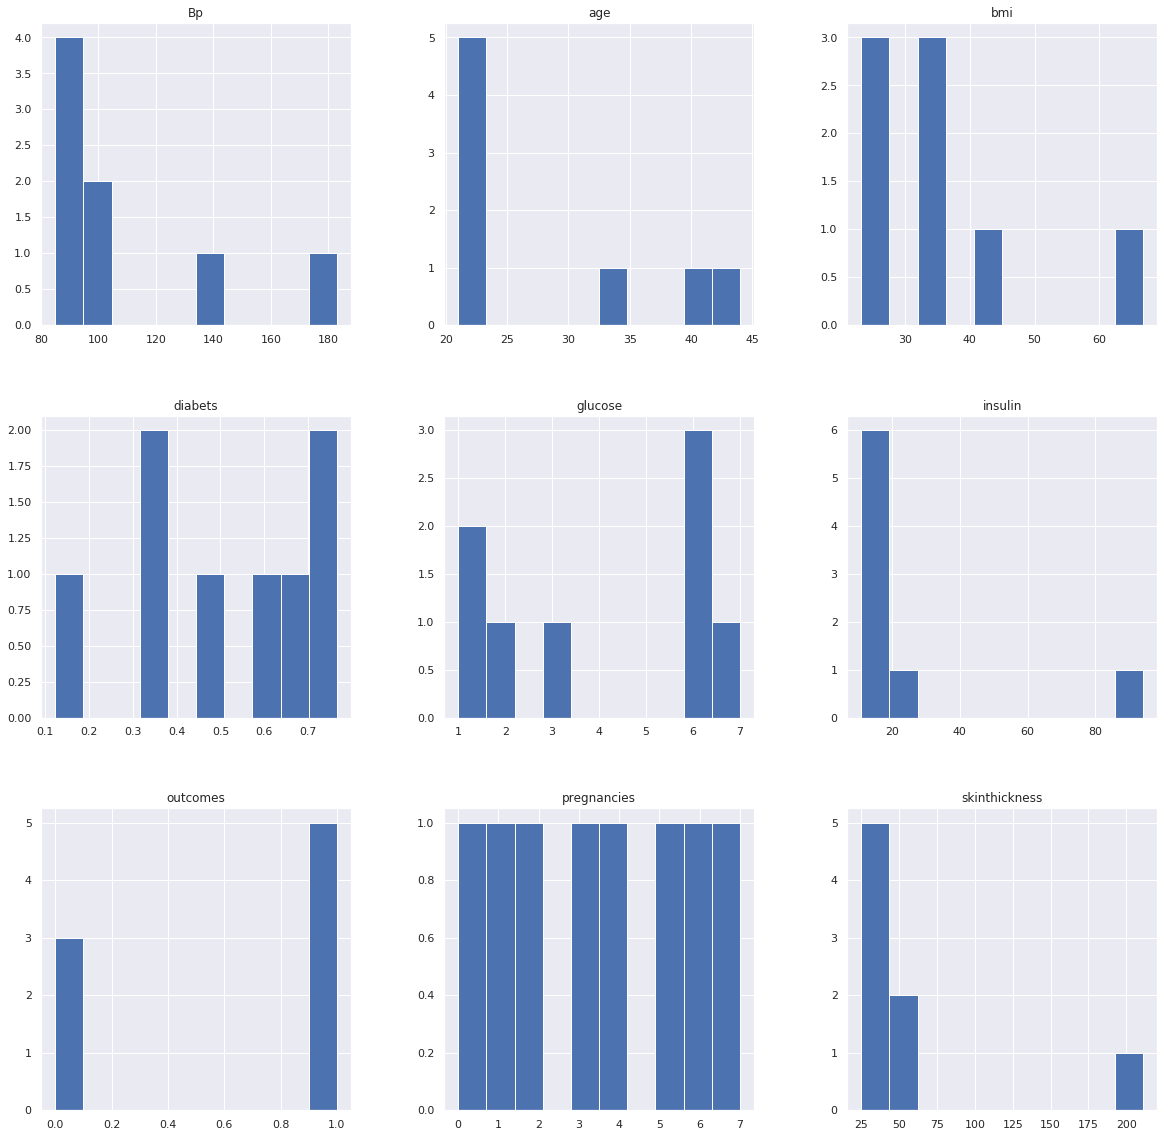

In [0]:
p = diabetes_data_copy.hist(figsize = (20,20))

In [0]:
diabetes_data.shape

(8, 9)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["outcomes"],axis = 1),),
        columns=['pregnancies', 'glucose', 'Bp', 'skinthickness', 'insulin',
       'bmi', 'diabetesPedigreeFunction', 'age'])

In [0]:
X.head()

,pregnancies,glucose,Bp,skinthickness,insulin,bmi,diabetesPedigreeFunction,age
0,-1.527525,0.852803,1.021266,-0.410929,-0.342078,-0.184572,0.537772,-0.638285
1,-1.091089,-1.279204,-0.746896,-0.583047,-0.342078,-0.717359,-0.721402,1.334595
2,-0.654654,0.852803,2.240687,-0.410929,-0.342078,-0.968530,0.743072,-0.870388
3,-0.218218,-1.279204,-0.624954,2.618331,2.625812,-0.755415,-1.761588,-0.754337
4,0.218218,-0.852803,-0.594468,-0.445353,-0.534798,-0.192184,-0.844582,-0.638285
